# Multilayer Perceptron

In [475]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [476]:
df = pd.read_csv("../db/db3.csv", header=None)
X = df.iloc[:, 2:]
scaler = StandardScaler()
X = scaler.fit_transform(X)

Y = df.iloc[:, 1]
labels = Y.unique().tolist()
le = LabelEncoder()
Y = le.fit_transform(Y)
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, train_size=0.7, random_state=1
)

0.9415204678362573
0.8888888888888888
0.9180327868852458


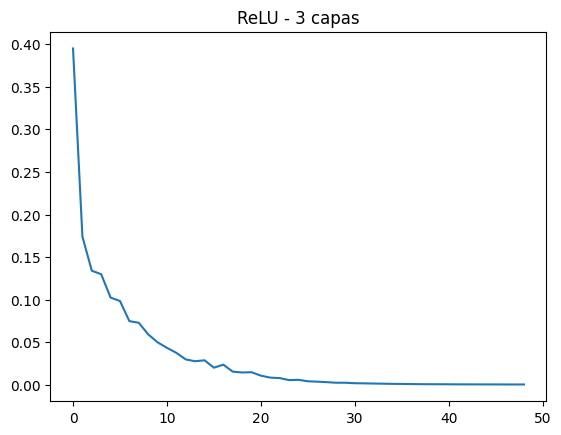

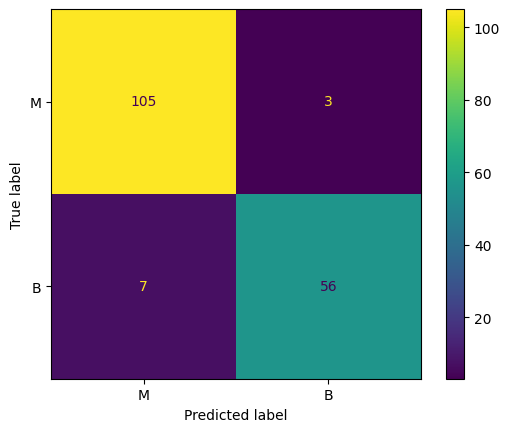

In [477]:
clf = MLPClassifier(
    learning_rate_init=0.01,
    max_iter=300,
    tol=1e-4,
    activation="tanh",
    random_state=0,
    hidden_layer_sizes=(
        100,
        100,
        100,
    ),
)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Precision, Recall, f1-score
print(accuracy_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

# Loss Curve graph
plt.plot(clf.loss_curve_)
plt.title("ReLU - 3 capas")

cf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix, display_labels=labels)
disp.plot()